In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import generate_random_sales


In [15]:
dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

product_A = generate_random_sales(50, 100, len(dates))
product_B = generate_random_sales(30, 80, len(dates))
product_C = generate_random_sales(20, 60, len(dates))
product_D = generate_random_sales(10, 50, len(dates))

df = pd.DataFrame({
    'Month': dates,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Product_D': product_D
})

df.to_csv('data/initial.csv', index=False)
df.head()

,Month,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,64,38,38,34
1,2025-02-01,97,55,28,23
2,2025-03-01,99,65,45,33
3,2025-04-01,70,80,40,27
4,2025-05-01,81,71,39,12


In [16]:
df['Total_Sales'] = df[['Product_A','Product_B','Product_C','Product_D']].sum(axis=1)
df['Average_Sales'] = df[['Product_A','Product_B','Product_C','Product_D']].mean(axis=1)

df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change().fillna(0) * 100

df['Quarter'] = df['Month'].dt.quarter

df['Max_Sales_Product'] = df[['Product_A','Product_B','Product_C','Product_D']].idxmax(axis=1)
df['Min_Sales_Product'] = df[['Product_A','Product_B','Product_C','Product_D']].idxmin(axis=1)

df.to_csv('data/final.csv', index=False)
df.head()


,Month,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,64,38,38,34,174,43.50,0.000000,1,Product_A,Product_D
1,2025-02-01,97,55,28,23,203,50.75,16.666667,1,Product_A,Product_D
2,2025-03-01,99,65,45,33,242,60.50,19.211823,1,Product_A,Product_D
3,2025-04-01,70,80,40,27,217,54.25,-10.330579,2,Product_B,Product_D
4,2025-05-01,81,71,39,12,203,50.75,-6.451613,2,Product_A,Product_D


In [17]:
pivot_avg = df.pivot_table(
    index='Quarter',
    values=['Product_A','Product_B','Product_C','Product_D'],
    aggfunc='mean'
)

pivot_total = df.pivot_table(
    index='Quarter',
    values='Total_Sales',
    aggfunc='sum'
)

output = pd.concat([pivot_avg, pivot_total], axis=1)

output.to_csv('data/output.csv')
output


,Product_A,Product_B,Product_C,Product_D,Total_Sales
Quarter,,,,,
1,86.666667,52.666667,37.000000,30.000000,619
2,67.000000,68.666667,34.000000,18.666667,565
3,74.333333,68.333333,45.333333,37.000000,675
4,66.000000,70.000000,28.666667,31.666667,589


In [18]:
best_month = df.loc[df['Total_Sales'].idxmax(), 'Month']
best_product = df[['Product_A','Product_B','Product_C','Product_D']].sum().idxmax()
best_quarter = output['Total_Sales'].idxmax()

best_month, best_product, best_quarter


(Timestamp('2025-07-01 00:00:00'), 'Product_A', np.int32(3))

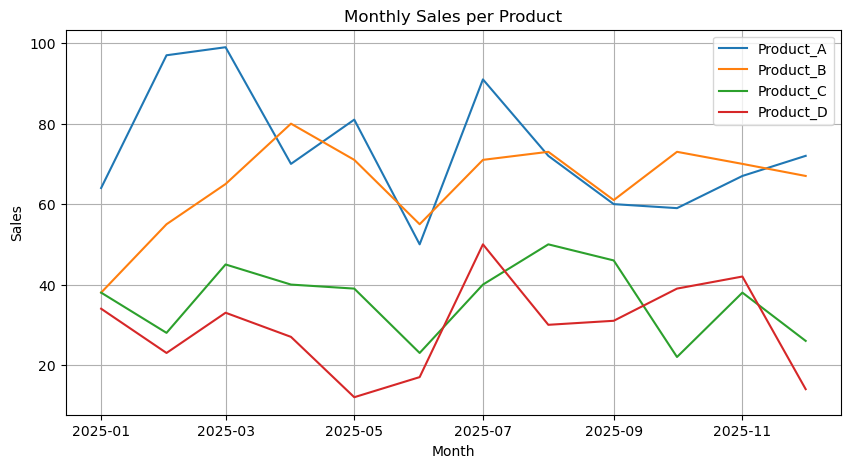

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df['Month'], df['Product_A'], label='Product_A')
plt.plot(df['Month'], df['Product_B'], label='Product_B')
plt.plot(df['Month'], df['Product_C'], label='Product_C')
plt.plot(df['Month'], df['Product_D'], label='Product_D')

plt.title("Monthly Sales per Product")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


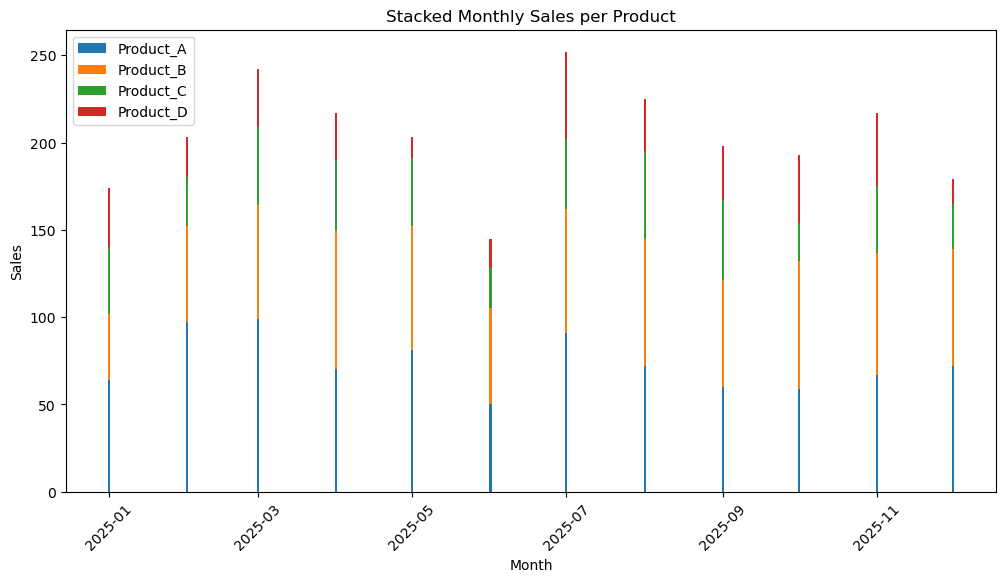

In [20]:
plt.figure(figsize=(12,6))

plt.bar(df['Month'], df['Product_A'], label='Product_A')
plt.bar(df['Month'], df['Product_B'], bottom=df['Product_A'], label='Product_B')
plt.bar(df['Month'], df['Product_C'], 
        bottom=df['Product_A'] + df['Product_B'], label='Product_C')
plt.bar(df['Month'], df['Product_D'], 
        bottom=df['Product_A'] + df['Product_B'] + df['Product_C'], label='Product_D')

plt.title("Stacked Monthly Sales per Product")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()



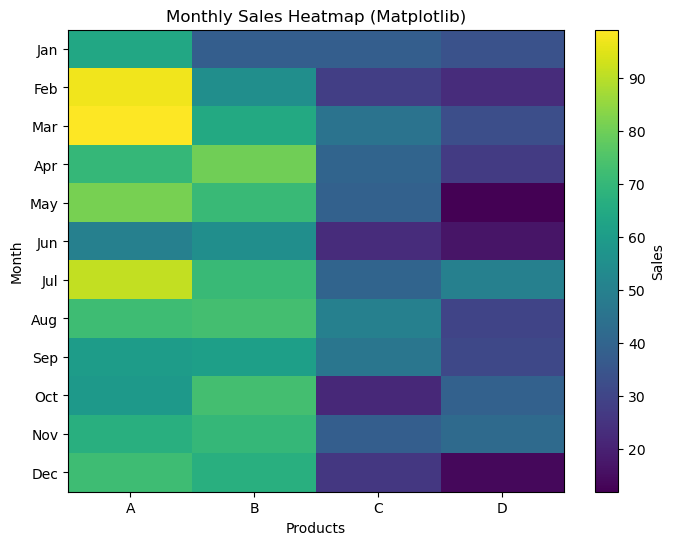

In [21]:
data = df[['Product_A','Product_B','Product_C','Product_D']].values

plt.figure(figsize=(8,6))
plt.imshow(data, aspect='auto')
plt.colorbar(label="Sales")
plt.title("Monthly Sales Heatmap (Matplotlib)")
plt.xlabel("Products")
plt.ylabel("Month")

plt.xticks(ticks=range(4), labels=['A','B','C','D'])
plt.yticks(ticks=range(len(df)), labels=df['Month'].dt.strftime('%b'))

plt.show()


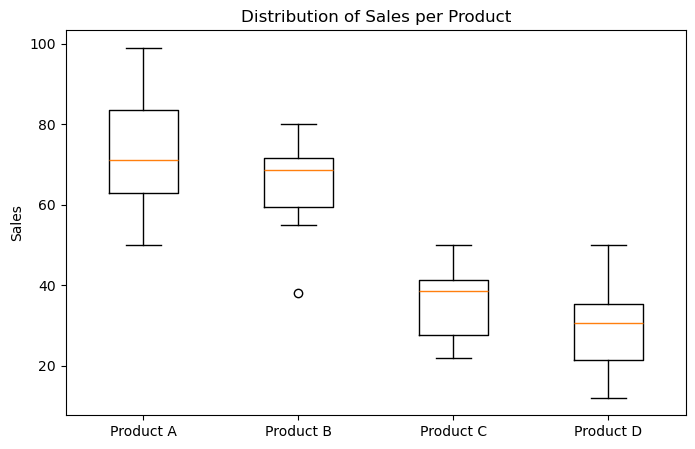

In [24]:
plt.figure(figsize=(8,5))
plt.boxplot(
    [
        df['Product_A'],
        df['Product_B'],
        df['Product_C'],
        df['Product_D']
    ],
    tick_labels=['Product A','Product B','Product C','Product D']
)

plt.title("Distribution of Sales per Product")
plt.ylabel("Sales")
plt.show()
